<a href="https://colab.research.google.com/github/viferraro/DeepLearning/blob/main/MNISTAlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyJoules[nvidia]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.9 MB/s eta 0:00:00


In [2]:
!pip install keras_flops

In [3]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.python.client import device_lib
from datetime import datetime
from keras_flops import get_flops
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
SEED = 10

In [5]:
# Carregando os dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Dividindo o conjunto de treinamento em treinamento e validação
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

# Pré-processando os dados
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')
x_valid = x_valid.reshape(-1, 28, 28, 1).astype('float32')

x_train /= 255
x_test /= 255
x_valid /= 255

n_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, n_classes)

11490434/11490434 [==============================] - 2s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        3

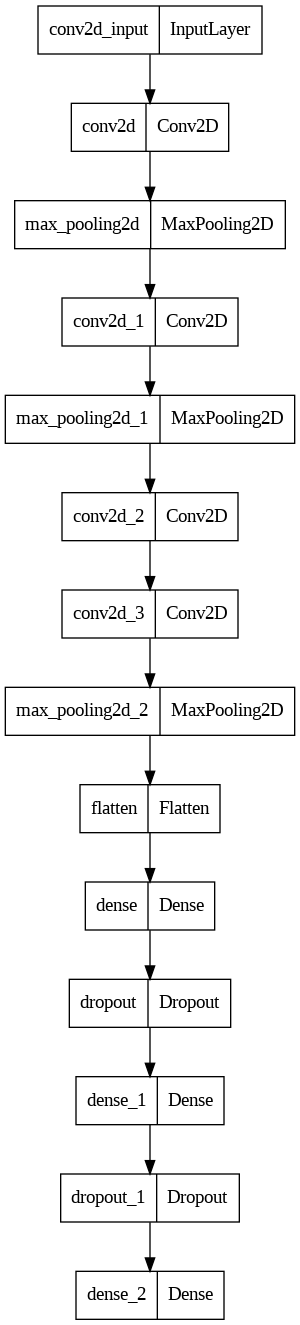

In [6]:
model = Sequential()

model.add(Conv2D(32, input_shape=(28, 28, 1), kernel_size=(3, 3), strides=(1, 1), activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

tf.keras.utils.plot_model(model)    #cria um diagrama mostrando a arquitetura do modelo

In [7]:
tempo1 = datetime.now()

history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_valid, y_valid),
callbacks=[EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=False,
                                             restore_best_weights=True)])

tempo2 = datetime.now()

print(f"O tempo de treino em (hh:mm:ss.ms) foi {tempo2-tempo1}")

flops = get_flops(model, batch_size=128)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

Epoch 1/20
375/375 [==============================] - 15s 6ms/step - loss: 0.1822 - accuracy: 0.9437 - val_loss: 0.0618 - val_accuracy: 0.9805
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.0551 - val_accuracy: 0.9832
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0524 - val_accuracy: 0.9847
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.0662 - val_accuracy: 0.9817
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.0427 - val_accuracy: 0.9884
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0306 - accuracy: 0.9911 - val_loss: 0.0443 - val_accuracy: 0.9886
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0431 - val_accuracy: 0.9879
Epoch

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


FLOPS: 5.67 G


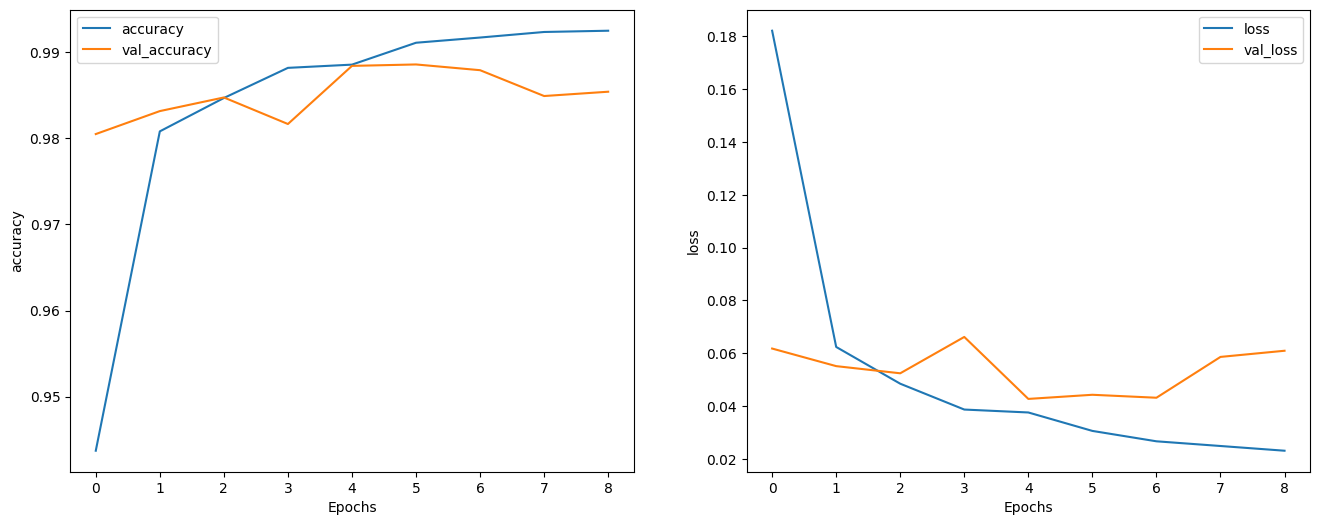

In [8]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [9]:
tempo3 = datetime.now()
y_pred = model.predict(x_test)
tempo4 = datetime.now()
print(f"O tempo de treino em (hh:mm:ss.ms) foi {tempo4-tempo3}")

313/313 [==============================] - 1s 2ms/step
O tempo de treino em (hh:mm:ss.ms) foi 0:00:00.995152


In [10]:
# Convertendo as probabilidades previstas em rótulos de classe previstos
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Acurácia: {accuracy}')

# Calculando a precisão
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
print(f'Precisão: {precision}')

# Calculando o recall
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
print(f'Recall: {recall}')

# Calculando o F1-Score
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
print(f'F1-Score: {f1}')

Acurácia: 0.9907
Precisão: 0.9907113482187759
Recall: 0.9906271919030786
F1-Score: 0.9906545846427994


In [11]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
print(cm)

[[ 975    1    0    0    0    0    3    1    0    0]
 [   0 1132    1    0    0    0    0    2    0    0]
 [   2    0 1021    0    0    0    1    8    0    0]
 [   0    0    1 1007    0    2    0    0    0    0]
 [   0    0    1    0  973    0    3    1    0    4]
 [   0    0    0    7    0  884    1    0    0    0]
 [   2    4    0    0    1    2  949    0    0    0]
 [   0    4    5    0    0    0    0 1019    0    0]
 [   2    0    1    1    1    0    3    0  963    3]
 [   6    0    0    0    4    5    1    6    3  984]]


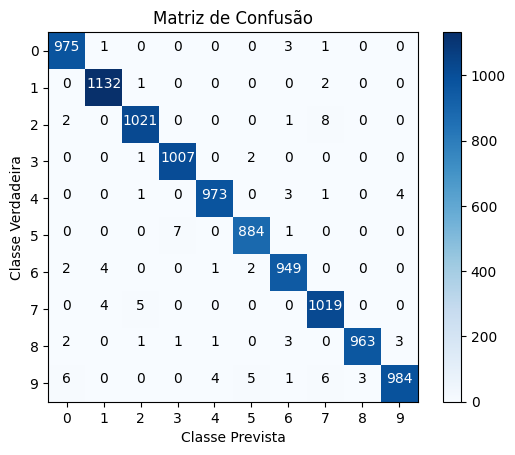

In [12]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()